In [1]:
import tensorflow as tf 
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import cv2
import os
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
# Run this cell if you have issues with intitializing cuDNN
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
input_dir = 'pets'
output_dir = input_dir + '/output'
glob_dir = input_dir + '/*.jpg'

In [4]:
images = [cv2.cvtColor(cv2.resize(cv2.imread(file), (224, 224)),cv2.COLOR_BGR2RGB) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [5]:
model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

In [6]:
sil = []
kl = []
kmax = 10

for k in range(2, kmax+1):
  kmeans2 = KMeans(n_clusters = k).fit(pred_images)
  labels = kmeans2.labels_
  sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
  kl.append(k)

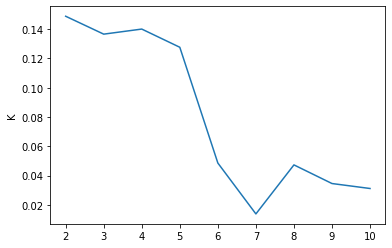

In [7]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

# You can decide the optimal value of K. For the pets example, its 2.

In [8]:
n = 2
kmodel = KMeans(n_clusters=n, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('output')
for i in range(n):
	os.makedirs("output\cluster" + str(i))
for i in range(len(paths)):
	shutil.copy2(paths[i], "output\cluster"+str(kpredictions[i]))